In [15]:
import pandas as pd
from tqdm.notebook import tqdm
import numpy as np

In [16]:
al =["[Branch1_1]", "[Branch1_2]", "[Branch1_3]", "[Ring1]", "[Branch2_1]", "[Branch2_2]", "[Branch2_3]", "[Ring2]", "[Branch3_1]", "[Branch3_2]", "[Branch3_3]", "[Ring3]", "[O]", "[=O]", "[N]", "[=N]", "[C]", "[=C]", "[#C]", "[S]", "[=S]", "[P]", "[F]", "[C@Hexpl]", "[C@@Hexpl]", "[C@expl]", "[C@@expl]", "[H]", "[NHexpl]", "[epsilon]", "[Cl]", "[#N]", "[Br]"]

In [20]:
al = dict(zip(al, [0]*len(al) ))

In [18]:
a.selfies[0]

'[C][C][C][S][Branch1_3][epsilon][=O][C][=C][C][=C][NHexpl][C][Branch1_3][Branch2_1][=N][C][Branch1_3][epsilon][=O][O][C][NHexpl][C][Ring1][Branch2_2][=C][Ring1][=O]'

In [23]:
for i in tqdm(range(len(a))):
    for element in [i+']' for i in a.selfies[i].split("]")[:-1]]:
        al[element] += 1

  0%|          | 0/1584663 [00:00<?, ?it/s]

In [53]:
out =np.array(list(al.values()), dtype=float)

In [54]:
out

array([ 1280295.,  1643728.,  4126771.,  4212951.,   320248.,   574029.,
         580612.,   852857.,        0.,        0.,        0.,        0.,
        1765463.,  2173567.,  3488336.,  1317561., 17967381.,  7164111.,
         251376.,   741669.,    85226.,        0.,   704628.,        0.,
              0.,        0.,        0.,        0.,   178790.,  4098144.,
         187351.,   279530.,    52677.])

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
al.keys()

dict_keys(['[Branch1_1]', '[Branch1_2]', '[Branch1_3]', '[Ring1]', '[Branch2_1]', '[Branch2_2]', '[Branch2_3]', '[Ring2]', '[Branch3_1]', '[Branch3_2]', '[Branch3_3]', '[Ring3]', '[O]', '[=O]', '[N]', '[=N]', '[C]', '[=C]', '[#C]', '[S]', '[=S]', '[P]', '[F]', '[C@Hexpl]', '[C@@Hexpl]', '[C@expl]', '[C@@expl]', '[H]', '[NHexpl]', '[epsilon]', '[Cl]', '[#N]', '[Br]'])

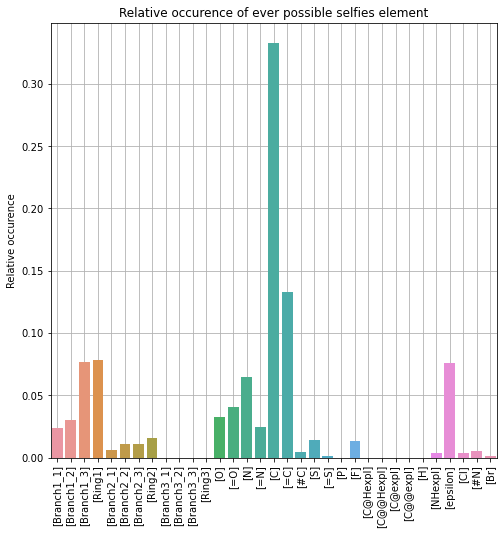

In [70]:
f,ax = plt.subplots(1,1,figsize=(8,8))

sns.barplot(y=np.array(list(al.values()))/sum(np.array(list(al.values()))),x=list(al.keys()))
plt.xticks(rotation = 90)
plt.ylabel("Relative occurence")
ax.set_axisbelow(True)
plt.grid()
plt.title("Relative occurence of ever possible selfies element")
pass

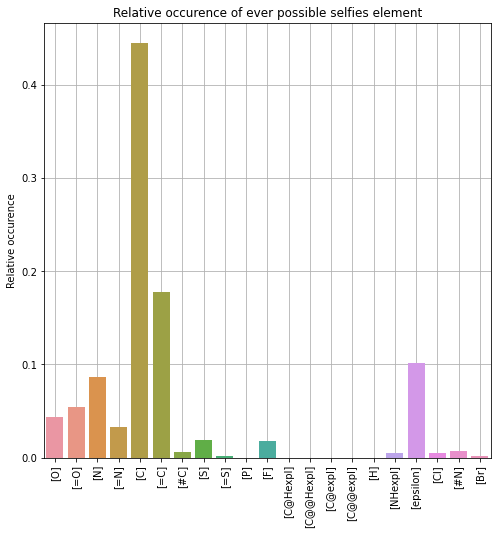

In [71]:
f,ax = plt.subplots(1,1,figsize=(8,8))

sns.barplot(y=np.array(list(al.values())[12:])/sum(np.array(list(al.values())[12:])),x=list(al.keys())[12:])
plt.xticks(rotation = 90)
plt.ylabel("Relative occurence")
ax.set_axisbelow(True)
plt.grid()
plt.title("Relative occurence of ever possible selfies element")
pass

In [47]:
for i in range(len(out)):
    if(out[i] != 0):
        out[i] = 1.0/out[i]

In [49]:
out /= sum(out)

In [50]:
out

array([0.0121831 , 0.00948938, 0.0037797 , 0.00370239, 0.0487059 ,
       0.02717279, 0.0268647 , 0.01828908, 0.        , 0.        ,
       0.        , 0.        , 0.00883506, 0.00717621, 0.00447146,
       0.01183852, 0.00086813, 0.00217724, 0.06205034, 0.0210309 ,
       0.18301888, 0.        , 0.02213646, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.08724183, 0.00380611,
       0.08325532, 0.05580069, 0.29610583])

In [17]:
from dataloaders.molDataset_simplified import molDataset, Loader

In [18]:
loaders = Loader(maps_path='map_files/',
                    csv_path="data/moses_train.csv",
                    vocab="selfies",
                    build_alphabet=False,
                    alphabet_name = "moses_alphabets.json", 
                    n_mols=-1,
                    num_workers=1,
                    batch_size=64)
                #  props=properties,
                #  targets=targets)

train_loader, _, test_loader = loaders.get_data()

Dataset columns: Index(['Unnamed: 0', 'smiles', 'selfies'], dtype='object')
> Loaded edge and atoms types to one-hot mappings
-> Careful : Using PREDEFINED selfies alphabet : moses_alphabets.json
> Loaded alphabet. Using selfies. Max sequence length allowed is 54


In [5]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='6'

In [19]:
from tqdm.notebook import tqdm
import dgl

In [20]:
for i, (graph, smile) in tqdm(enumerate(train_loader), total = len(train_loader)):
    s = smile
    save_graphs("data/batched_dataset/{}.bin".format(i),dgl.unbatch(graph))
    if(i==10):
        break

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f6d3c461dd0>
Traceback (most recent call last):
  File "/home/mcb/users/achol1/.conda/envs/optimol2/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 962, in __del__
    self._shutdown_workers()
  File "/home/mcb/users/achol1/.conda/envs/optimol2/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 942, in _shutdown_workers
    w.join()
  File "/home/mcb/users/achol1/.conda/envs/optimol2/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f6d3c461dd0>
Traceback (most recent call last):
  File "/home/mcb/users/achol1/.conda/envs/optimol2/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 962, in __del__
    self._shutdown_workers()
  File "/home/mcb/users/achol1/.

In [34]:
import sys

In [35]:
sys.getsizeof(g)

920

In [7]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [8]:
device

'cuda'

In [2]:
from dgl.data.utils import save_graphs

Using backend: pytorch


In [3]:
from dgl.data.utils import load_graphs

In [23]:
for _ in range(100):
    load_graphs("data/onebatch.bin")

In [21]:
save_graphs("data/onebatch.bin",dgl.unbatch(g[0]))

In [19]:
g[0].__dict__

{'_graph': <dgl.graph_index.GraphIndex at 0x7f5b144facd0>,
 '_node_frame': <dgl.frame.FrameRef at 0x7f5b144f9d50>,
 '_edge_frame': <dgl.frame.FrameRef at 0x7f5b145045d0>,
 '_msg_index': None,
 '_msg_frame': <dgl.frame.FrameRef at 0x7f5b145048d0>,
 '_message_func': None,
 '_reduce_func': None,
 '_apply_node_func': None,
 '_apply_edge_func': None,
 '_batch_num_nodes': [25,
  18,
  20,
  23,
  20,
  24,
  23,
  19,
  22,
  23,
  22,
  18,
  19,
  18,
  22,
  15,
  21,
  20,
  17,
  19,
  21,
  19,
  23,
  25,
  23,
  24,
  20,
  25,
  19,
  21,
  20,
  24,
  24,
  18,
  20,
  23,
  25,
  25,
  21,
  21,
  23,
  22,
  24,
  17,
  22,
  20,
  25,
  22,
  21,
  20,
  20,
  21,
  22,
  25,
  24,
  23,
  25,
  21,
  25,
  23,
  24,
  24,
  17,
  23],
 '_batch_num_edges': [54,
  40,
  42,
  50,
  44,
  50,
  50,
  38,
  48,
  50,
  48,
  38,
  38,
  38,
  50,
  30,
  44,
  42,
  34,
  42,
  44,
  40,
  50,
  54,
  48,
  52,
  42,
  52,
  40,
  44,
  42,
  50,
  50,
  36,
  42,
  50,
  54,
  54,

In [15]:
save_graphs("data/100graphs.bin", g[0])

AssertionError: Batched DGLGraph is not supported for serialization

In [9]:
from dgl_utils import send_graph_to_device

In [10]:
for i in range(len(g)):
    send_graph_to_device(g[i], device)

In [15]:
s[0]

tensor([16, 12, 16,  2, 29, 13, 16, 16, 16, 19,  0, 29, 13,  2, 29, 13, 14, 16,
        16,  2, 29, 16, 16, 16,  2, 29, 16, 16,  3,  2, 29, 29, 29, 29, 29, 29,
        29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29])

In [16]:
from rdkit import Chem

In [17]:
from selfies import decoder, encoder

In [24]:
srg = ""
for c in s[0]:
    srg +=  al[c]

In [25]:
srg

'[C][O][C][Branch1_3][epsilon][=O][C][C][C][S][Branch1_1][epsilon][=O][Branch1_3][epsilon][=O][N][C][C][Branch1_3][epsilon][C][C][C][Branch1_3][epsilon][C][C][Ring1][Branch1_3][epsilon][epsilon][epsilon][epsilon][epsilon][epsilon][epsilon][epsilon][epsilon][epsilon][epsilon][epsilon][epsilon][epsilon][epsilon][epsilon][epsilon][epsilon][epsilon][epsilon][epsilon][epsilon][epsilon][epsilon]'

In [26]:
decoder(srg)

'COC(=O)CCCS(=O)(=O)N1CC(C)CC(C)C1'

In [ ]:
Chem.MolFromSmiles()